# Feature engineering

1. Missing values
1. Temporal variables
1. Non-Gaussian distributed variables
1. Categorical variables: remove rare labels
1. Categorical variables: convert strings to numbers
1. Standarise the values of the variables to the same range

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from typing import List, Union, Optional, Set, Callable

In [3]:
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
pd.pandas.set_option('display.max_columns', None)

In [6]:
data = pd.read_csv("./data/houseprice.csv")
data.shape

(1460, 81)

In [7]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, data['SalePrice'], test_size=0.1, random_state=0)
X_train.shape, X_test.shape

((1314, 81), (146, 81))

## Missing values

### Categorical variables

In [9]:
cols_with_na = [c 
                for c in data.columns 
                if X_train[c].isna().sum()>0 
                and X_train[c].dtypes=='O']
cols_with_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
# % rows with missing values 
for col in cols_with_na:
    print(f"{col:12}: {X_train[col].isna().mean():.3f}")

Alley       : 0.938
MasVnrType  : 0.005
BsmtQual    : 0.024
BsmtCond    : 0.024
BsmtExposure: 0.025
BsmtFinType1: 0.024
BsmtFinType2: 0.025
Electrical  : 0.001
FireplaceQu : 0.473
GarageType  : 0.056
GarageFinish: 0.056
GarageQual  : 0.056
GarageCond  : 0.056
PoolQC      : 0.995
Fence       : 0.814
MiscFeature : 0.961


Replace missing values with `"Missing"`

In [11]:
def fill_categorical_na(df:pd.DataFrame, cols:List[str]):
    df = df.copy()
    df[cols] = df[cols].fillna("Missing")
    return df

In [12]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
930,931,20,RL,73.0,8925,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,16,Unf,0,1450,1466,GasA,Ex,Y,SBrkr,1466,0,0,1466,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,3,610,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,201000
656,657,20,RL,72.0,10007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,2006,Gable,CompShg,HdBoard,HdBoard,BrkFace,54.0,Gd,TA,CBlock,TA,TA,No,ALQ,806,Unf,0,247,1053,GasA,Ex,Y,SBrkr,1053,0,0,1053,1,0,1,1,3,1,Gd,5,Typ,0,NaN,Attchd,1959.0,RFn,1,312,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD,Normal,145500
45,46,120,RL,61.0,7658,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,412.0,Ex,TA,PConc,Ex,TA,No,GLQ,456,Unf,0,1296,1752,GasA,Ex,Y,SBrkr,1752,0,0,1752,1,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2005.0,RFn,2,576,TA,TA,Y,196,82,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,319900
1348,1349,20,RL,NaN,16196,Pave,NaN,IR3,Low,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1443,Unf,0,39,1482,GasA,Ex,Y,SBrkr,1494,0,0,1494,1,0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,1998.0,RFn,2,514,TA,TA,Y,402,25,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,215000
55,56,20,RL,100.0,10175,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1964,1964,Gable,CompShg,HdBoard,Plywood,BrkFace,272.0,TA,TA,CBlock,TA,TA,No,BLQ,490,Unf,0,935,1425,GasA,Gd,Y,SBrkr,1425,0,0,1425,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,1964.0,RFn,2,576,TA,TA,Y,0,0,0,407,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,180500


In [13]:
# Fill missing categorical values
X_train = fill_categorical_na(X_train, cols_with_na)
X_test = fill_categorical_na(X_test, cols_with_na)

# Check we have no more cols with missing na
X_train[cols_with_na].isna().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

### Numerical cols

For numerical values, we impute by using the mode and have a separate col to idicate the value is missing

In [14]:
cols_with_na = [c 
                for c in data.columns 
                if X_train[col].isna().sum() 
                and X_train[col].dtypes!='O']
cols_with_na

[]

In [15]:
# Show cols with missing vals

cols_with_na = [c for c in data.columns if X_train[c].isna().sum()]
for c in cols_with_na:
    print(f"{c:12}: {X_train[c].isna().mean():.3f}")

LotFrontage : 0.177
MasVnrArea  : 0.005
GarageYrBlt : 0.056


In [16]:
# Populate with mode of TRAIN in both train and test

# DO NOT RUN THIS TWICE
for col in cols_with_na:
    mode = X_train[col].mode()[0]
    
    X_train[col +'_na'] = np.where(X_train[col].isna(), 1, 0)
    X_train[col].fillna(mode, inplace=True)
    
    X_test[col +'_na'] = np.where(X_test[col].isna(), 1, 0)
    X_test[col].fillna(mode, inplace=True)

X_train[cols_with_na].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [17]:
na_cols = [x+'_na' for x in list(cols_with_na)]
X_train[na_cols].head()

,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,0,0,0
656,0,0,0
45,0,0,0
1348,1,0,0
55,0,0,0


In [18]:
[c for x in cols_with_na if X_test[c].isna().sum()]

[]

### Temporal cols

In [19]:
def years_to_elapsed_years(df, col):
    df[col] = df['YrSold'] - df[col]
    return df

In [20]:
cols_temporal = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for col in cols_temporal:
    X_train = years_to_elapsed_years(X_train, col)
    X_test = years_to_elapsed_years(X_test, col)

In [21]:
[c for c in cols_temporal if X_test[c].isna().sum() ]

[]

### Logify numerical cols

In [22]:
log_cols = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] 
for c in log_cols:
    X_train[c] = np.log(X_train[c])
    X_test[c] = np.log(X_test[c])

In [23]:
[c for c in log_cols if X_train[c].isna().sum()]

[]

In [24]:
[c for c in log_cols if X_test[c].isna().sum()]

[]

### Categorical variables

In [25]:
cat_vars = [c for c in X_train.columns if X_train[c].dtype =='O']
cat_vars

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
def find_frequent_labels(df, col, ignore_lte:float=0.01):
    """
    Return Index with the percentages:
    """
    df = df.copy()
    tmp = df.groupby(col)['SalePrice'].count() / len(df)
    return tmp[tmp > ignore_lte].index


In [27]:
find_frequent_labels(data, 'LandContour')

Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')

In [28]:
for col in cat_vars:
    keep_labels = find_frequent_labels(data, col)
    X_train[col] = np.where(X_train[col].isin(keep_labels), 
                            X_train[col],
                            "Rare")
    X_test[col] = np.where(X_test[col].isin(keep_labels), 
                           X_test[col], 
                           "Rare")


In [29]:
# Convert cats to numbers
# ! Ensure cols with smalller mean targets get smaller discrete numbers

def replace_categories_with_int(train:pd.DataFrame, test:pd.DataFrame, col:str, target_col):
    ordered_labels = train.groupby([col])[target_col].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels)}
    print(ordered_labels)
    print(ordinal_label)
    train[col] = train[col].map(ordinal_label)
    test[col] = test[col].map(ordinal_label)    

In [30]:
for col in cat_vars:
    replace_categories_with_int(X_train, X_test, col, 'SalePrice')

Index(['Rare', 'RM', 'RH', 'RL', 'FV'], dtype='object', name='MSZoning')
{'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}
Index(['Rare', 'Pave'], dtype='object', name='Street')
{'Rare': 0, 'Pave': 1}
Index(['Grvl', 'Pave', 'Rare'], dtype='object', name='Alley')
{'Grvl': 0, 'Pave': 1, 'Rare': 2}
Index(['Reg', 'IR1', 'Rare', 'IR2'], dtype='object', name='LotShape')
{'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3}
Index(['Bnk', 'Lvl', 'Low', 'HLS'], dtype='object', name='LandContour')
{'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}
Index(['Rare', 'AllPub'], dtype='object', name='Utilities')
{'Rare': 0, 'AllPub': 1}
Index(['Inside', 'FR2', 'Corner', 'Rare', 'CulDSac'], dtype='object', name='LotConfig')
{'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4}
Index(['Gtl', 'Mod', 'Rare'], dtype='object', name='LandSlope')
{'Gtl': 0, 'Mod': 1, 'Rare': 2}
Index(['IDOTRR', 'MeadowV', 'BrDale', 'Edwards', 'BrkSide', 'OldTown',
       'Sawyer', 'SWISU', 'NAmes', 'Mitchel', 'SawyerW', 'Rare', 'NWAmes',
   

In [31]:
[c for c in X_train.columns if X_train[c].isna().sum()]

[]

In [32]:
[c for c in X_test.columns if X_test[c].isna().sum()]

[]

In [33]:
X_train.groupby('Alley')['SalePrice'].mean()

Alley
0    11.663520
1    11.984131
2    12.038406
Name: SalePrice, dtype: float64

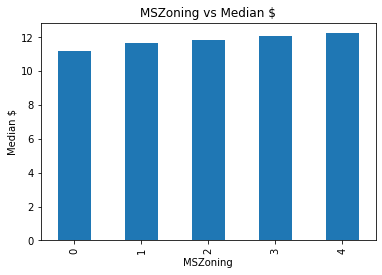

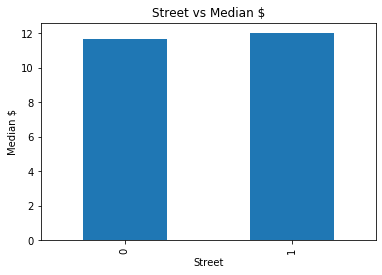

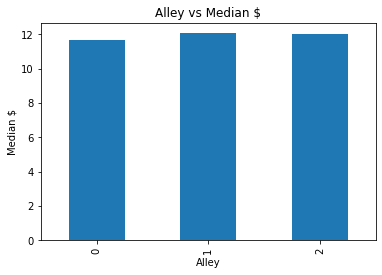

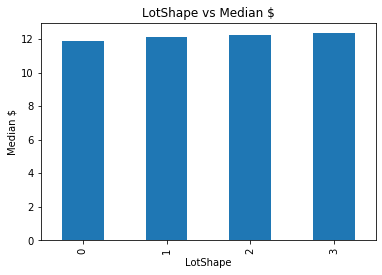

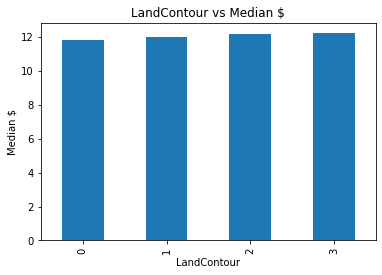

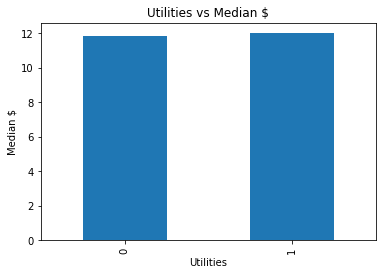

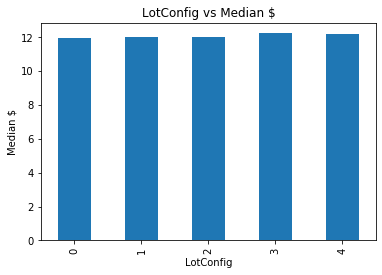

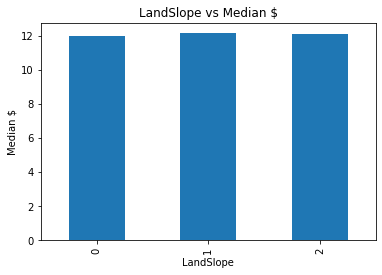

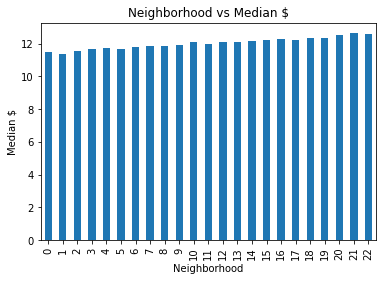

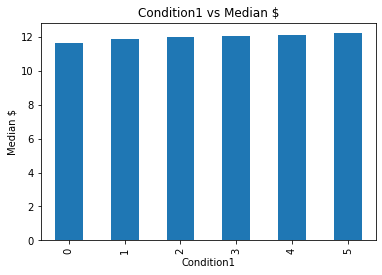

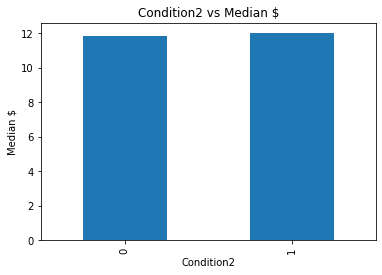

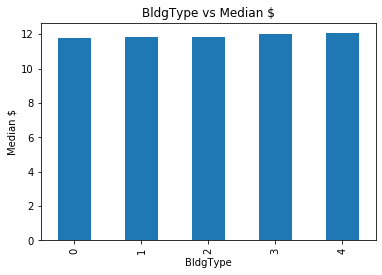

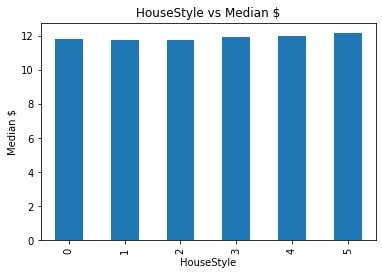

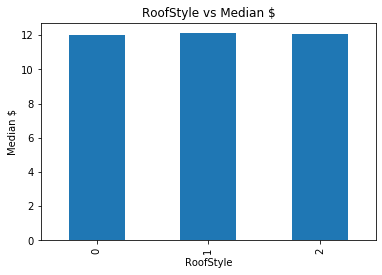

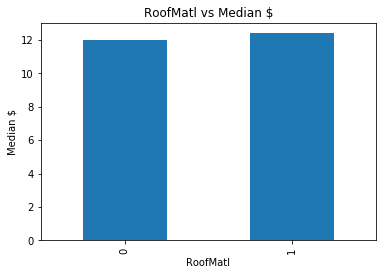

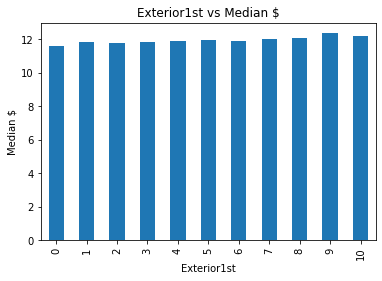

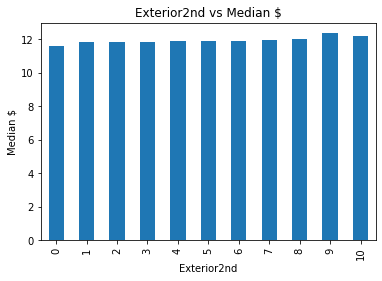

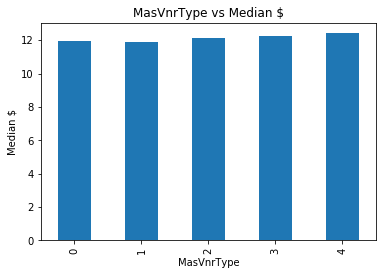

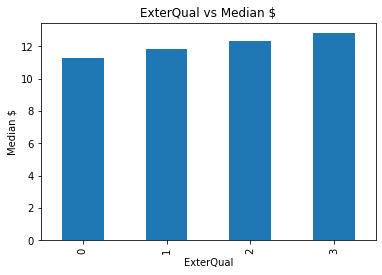

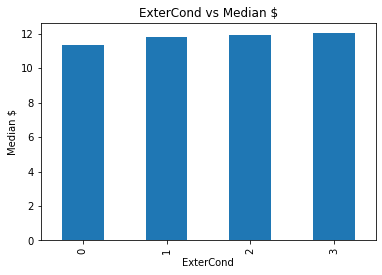

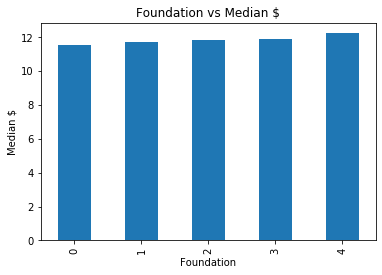

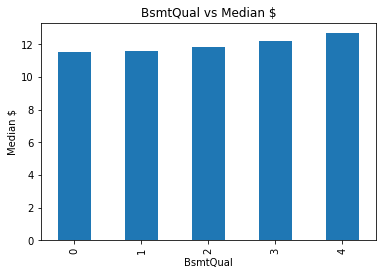

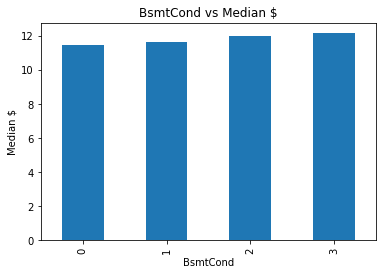

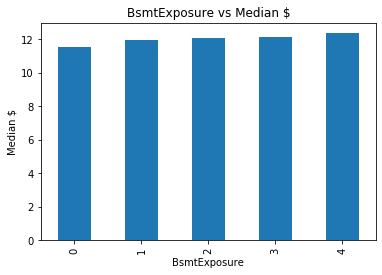

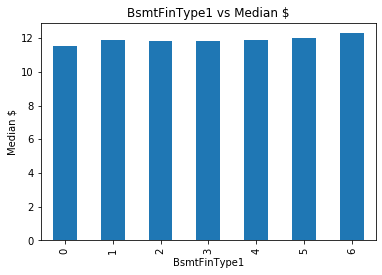

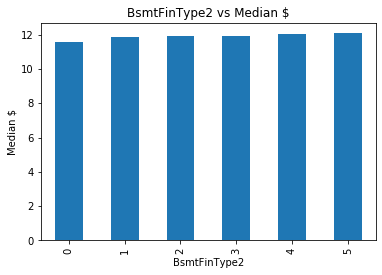

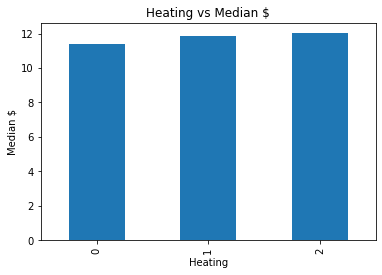

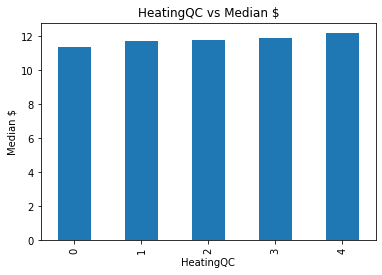

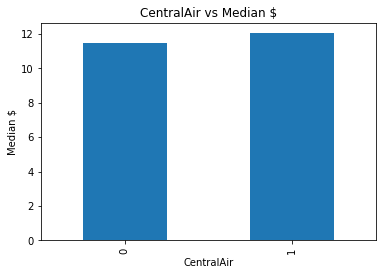

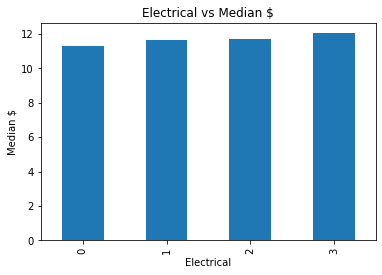

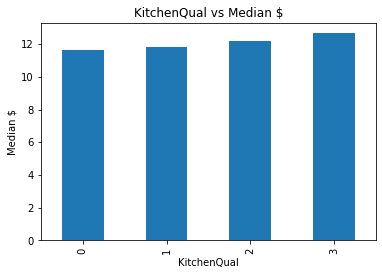

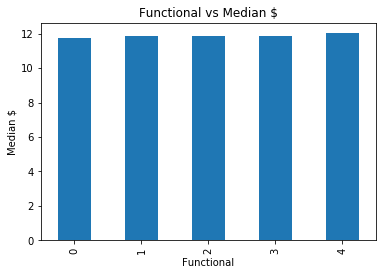

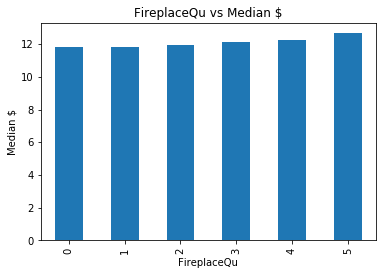

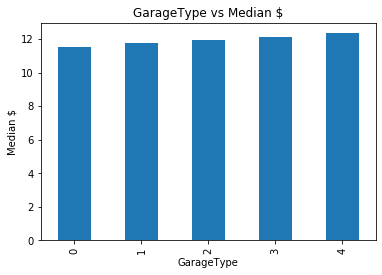

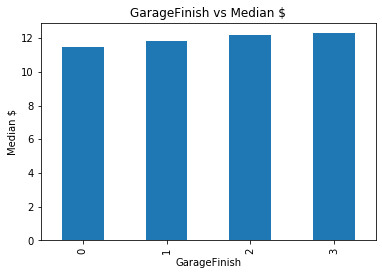

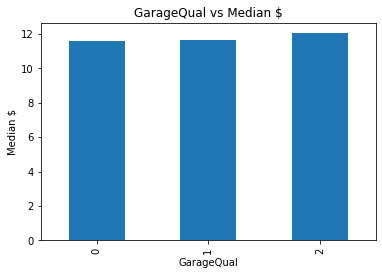

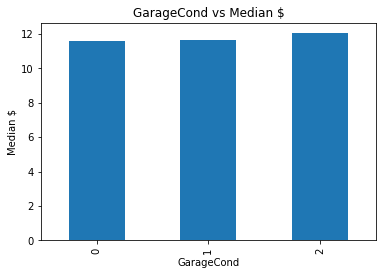

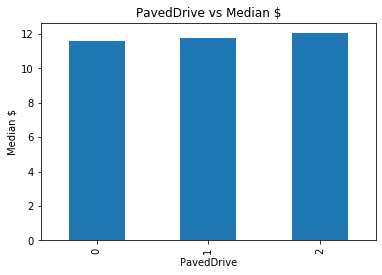

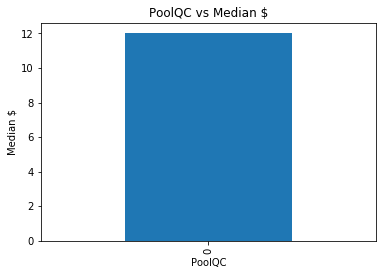

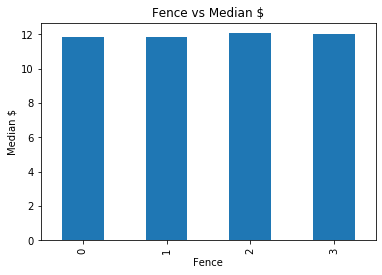

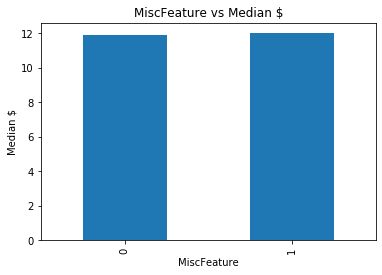

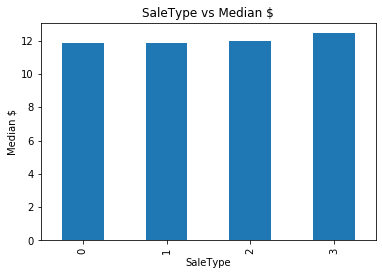

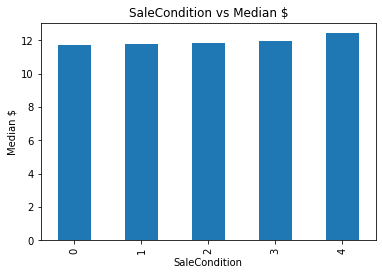

In [34]:
def analyse_cols(df, col):
    df = df.copy()
    df.groupby(col)['SalePrice'].median().plot.bar()
    
    plt.title(f"{col} vs Median $")
    plt.xlabel(f"{col}")
    plt.ylabel("Median $")
    plt.show()

for col in cat_vars:
    analyse_cols(X_train, col)

## Feature scaling

In [37]:
train_cols = [c for c in X_train.columns if c not in ['Id', 'SalePrice']]
len(train_cols)

82

In [38]:
X_train[["Id", "SalePrice"]].reset_index(drop=True)

,Id,SalePrice
0,931,12.211060
1,657,11.887931
2,46,12.675764
3,1349,12.278393
4,56,12.103486
...,...,...
1309,764,12.727838
1310,836,11.759786
1311,1217,11.626254
1312,560,12.363076


In [46]:
scaler = MinMaxScaler()
scaler.fit(X_train[train_cols])

X_train = pd.concat([
    X_train[['Id', 'SalePrice']].reset_index(drop=True),
    pd.DataFrame(
        scaler.transform(X_train[train_cols]), 
        columns=train_cols
    )],
    axis=1
)

X_test = pd.concat([
    X_test[['Id', 'SalePrice']].reset_index(drop=True),
    pd.DataFrame(
        scaler.transform(X_test[train_cols]), 
        columns=train_cols
    )],
    axis=1
)


In [48]:
X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.25,0.00000,0.666667,1.0,1.0,0.75,0.666667,0.75,1.000000,0.002835,0.8,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.75,0.018692,1.000000,0.75,0.430183,1.0,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.666667,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0
1,657,11.887931,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.50,0.03375,0.666667,1.0,0.5,0.50,0.666667,0.25,0.666667,0.142807,0.8,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.75,0.457944,0.666667,0.25,0.220028,1.0,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.333333,1.0,0.0,0.636364,0.50,0.666667,0.75,0.0,0.0,0.0
2,46,12.675764,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.50,0.25750,1.000000,1.0,1.0,1.00,0.666667,0.25,1.000000,0.080794,0.8,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.666667,0.50,0.406206,1.0,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.666667,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0
3,1349,12.278393,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.25,0.00000,0.666667,1.0,1.0,0.75,0.666667,1.00,1.000000,0.255670,0.8,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.666667,0.50,0.362482,1.0,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.666667,1.0,0.0,0.636364,0.25,0.666667,0.75,1.0,0.0,0.0
4,56,12.103486,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.50,0.17000,0.333333,1.0,0.5,0.50,0.666667,0.25,0.333333,0.086818,0.8,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.666667,0.50,0.406206,1.0,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.666667,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0


In [49]:
X_train.isna().sum()

Id                0
SalePrice         0
MSSubClass        0
MSZoning          0
LotFrontage       0
                 ..
SaleType          0
SaleCondition     0
LotFrontage_na    0
MasVnrArea_na     0
GarageYrBlt_na    0
Length: 84, dtype: int64

In [50]:
X_train.to_csv('./data/xtrain.csv', index=False)
X_test.to_csv('./data/xtest.csv', index=False)